<a href="https://colab.research.google.com/github/jiruneko/triple_nn/blob/main/triple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e92692452fdaf9ed9f176c6de2ff9f9130a9887fc96d1e09d10d31fbb4f0991f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [3]:
input_data = [[0, 0], [1, 0], [0, 1], [1, 1]]
xor_data = [0, 1, 1, 0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）:")
print(x_train)
print(f"学習データ（答え）:{y_train}")

学習データ（問題）:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）:[0 1 1 0]


In [4]:
model = keras.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=500,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8181 - val_accuracy: 0.2500 - val_loss: 0.8154
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2500 - loss: 0.8154 - val_accuracy: 0.2500 - val_loss: 0.8124
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.8124 - val_accuracy: 0.2500 - val_loss: 0.8096
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 0.8096 - val_accuracy: 0.2500 - val_loss: 0.8068
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.8068 - val_accuracy: 0.2500 - val_loss: 0.8040
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 0.8040 - val_accuracy: 0.2500 - val_loss: 0.8013
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 0.8013 - val_accuracy: 0.2500 - val_loss: 0.7986
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2500 - loss: 0.7986 - val_accuracy: 0.2500 - val_loss: 0

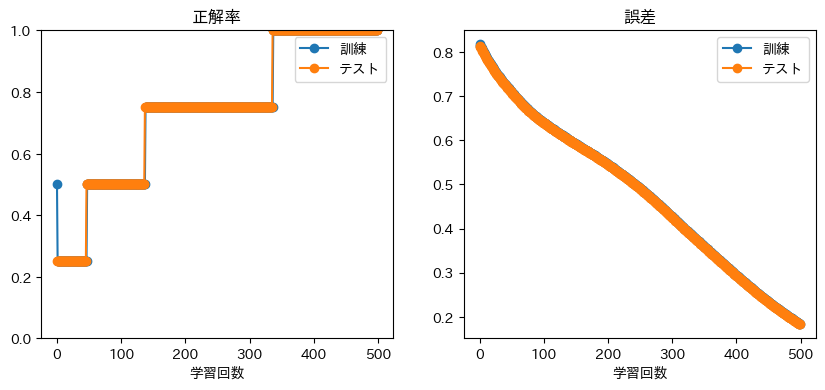

In [6]:
param = [["正解率", "accuracy", "val_accuracy"],
         ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10, 4))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.title(param[i][0])
  plt.plot(history.history[param[i][1]], "o-")
  plt.plot(history.history[param[i][2]], "o-")
  plt.xlabel("学習回数")
  plt.legend(["訓練", "テスト"], loc="best")
  if i==0:
    plt.ylim([0, 1])
plt.show()

In [7]:
pre = model.predict(x_test)
print(pre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[0.6687025  0.33129752]
 [0.11441437 0.8855856 ]
 [0.15743802 0.842562  ]
 [0.96691036 0.03308961]]


In [8]:
for i in range(4):
  index = np.argmax(pre[i])
  print(f"入力は{x_test[i]}、出力は{index}")

入力は[0 0]、出力は0
入力は[1 0]、出力は1
入力は[0 1]、出力は1
入力は[1 1]、出力は0
